<a href="https://colab.research.google.com/github/NavneetRajSingh/iNeubytes-Tasks/blob/main/Major_Project_iNeubytes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Major Project**

**Necessary Libraries**

---



In [129]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#Sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Wordcloud
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
data=pd.read_csv("https://github.com/Ankit152/IMDB-sentiment-analysis/raw/master/IMDB-Dataset.csv")

In [131]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [132]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [133]:
le = LabelEncoder()
data['sentiment']= le.fit_transform(data['sentiment'])
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [134]:
print('Number of Duplicate reviews:',data.duplicated().sum())
data.drop_duplicates(inplace=True)

Number of Duplicate reviews: 418


**Text Preprocessing**

---



In [135]:
data['review'] = data['review'].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [136]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def text_preprocessing(text):

    text = re.sub('<br />', '', text)
    # Remove URLs
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    # Remove Twitter mentions
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    filtered_text = [ps.stem(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_text)







data['review'] = data['review'].apply(text_preprocessing)
data

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previou comment side maltin one ...,0


In [137]:
ps = PorterStemmer()
def stemming(data):
    tokens = word_tokenize(data)
    filtered_text = [ps.stem(word) for word in tokens]
    return " ".join(filtered_text)
data['review'] = data['review'].apply(lambda x: stemming(x))
data


,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagr previou comment side maltin one s...,0


In [138]:
positive_reviews =  data[data.sentiment == 1]
positive_reviews.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
4,petter mattei love time money visual stun film...,1
5,probabl alltim favorit movi stori selfless sac...,1


In [139]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(5)

[('film', 48843),
 ('movi', 42899),
 ('one', 26837),
 ('like', 19813),
 ('time', 15402)]

In [140]:
negative_reviews =  data[data.sentiment == 0]
negative_reviews.head()

,review,sentiment
3,basic there famili littl boy jake think there ...,0
7,show amaz fresh innov idea 70 first air first ...,0
8,encourag posit comment film look forward watch...,0
10,phil alien one quirki film humour base around ...,0
11,saw movi 12 came recal scariest scene big bird...,0


In [141]:
count = Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(5)

[('movi', 55302),
 ('film', 42590),
 ('one', 25417),
 ('like', 23649),
 ('make', 15265)]

In [142]:
positive_words = pd.DataFrame(count.most_common(15))
positive_words.columns = ['word', 'count']
negative_words = pd.DataFrame(count.most_common(15))
negative_words.columns = ['word', 'count']

In [143]:
positive_words.head()

,word,count
0,movi,55302
1,film,42590
2,one,25417
3,like,23649
4,make,15265


In [144]:
negative_words.head()

,word,count
0,movi,55302
1,film,42590
2,one,25417
3,like,23649
4,make,15265


**Top 10 most repeated Positive Words**

---



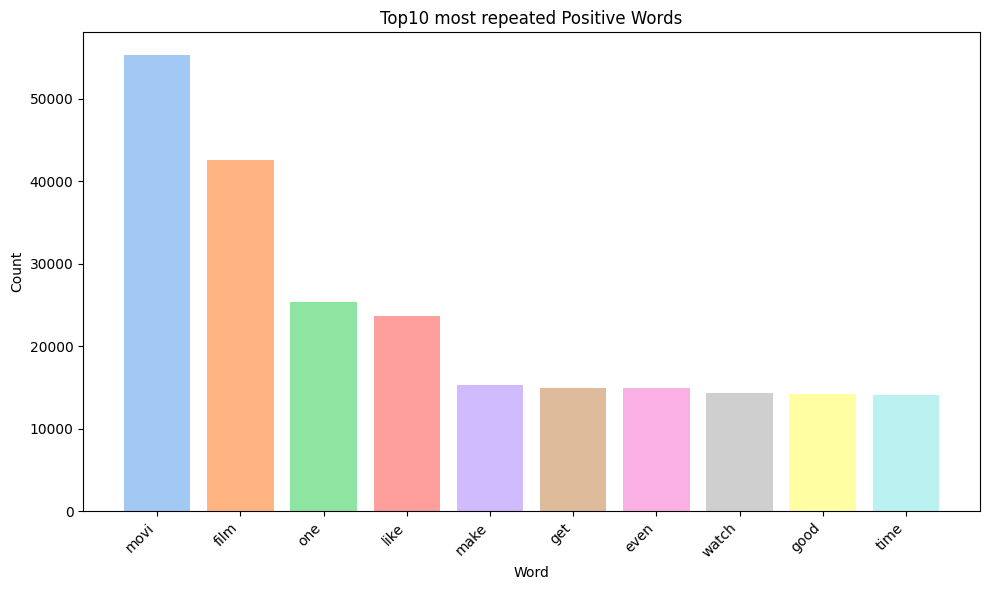

In [145]:
top_10_positive_words = positive_words.head(10)
colors = sns.color_palette('pastel', n_colors=len(top_10_positive_words))
plt.figure(figsize=(10, 6))
plt.bar(top_10_positive_words['word'], top_10_positive_words['count'],color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top10 most repeated Positive Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 10 most repeated Negative Words**

---



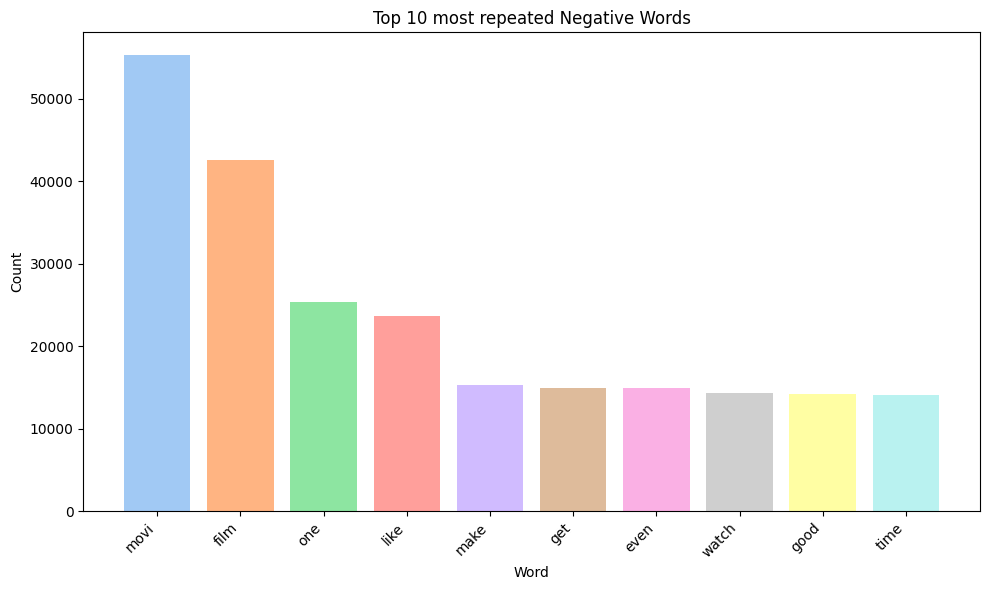

In [146]:
top_10_negative_words = negative_words.head(10)
colors = sns.color_palette('pastel', n_colors=len(top_10_positive_words))
plt.figure(figsize=(10, 6))
plt.bar(top_10_negative_words['word'], top_10_negative_words['count'],color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 most repeated Negative Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**WORDCLOUD - Most Frequent Words in Positive Reviews**

---



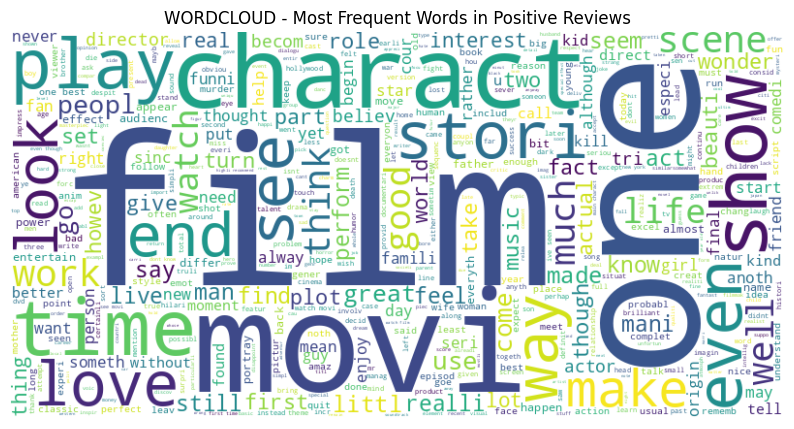

In [147]:
plt.figure(figsize=(10, 6), facecolor='white')
wordcloud = WordCloud(max_words=500,width=800,height=400,background_color='white', colormap='viridis',contour_width=2,contour_color='black').generate(' '.join(positive_reviews['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WORDCLOUD - Most Frequent Words in Positive Reviews')
plt.show()

**WORDCLOUD - Most Frequent Words in Negative Reviews**

---



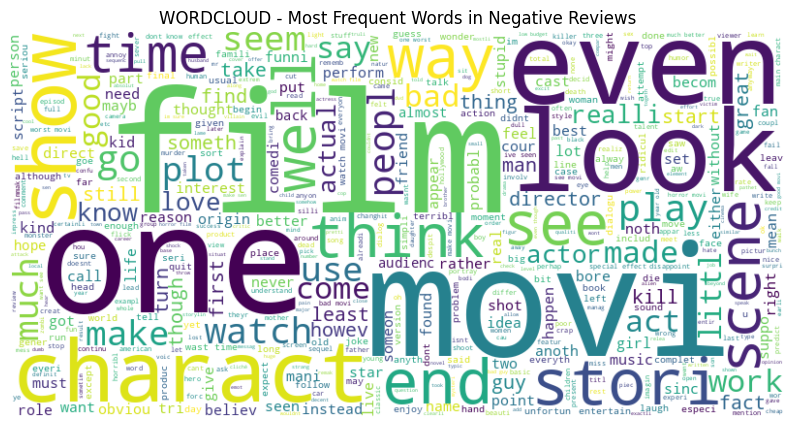

In [148]:
plt.figure(figsize=(10, 6), facecolor='white')
wordcloud = WordCloud(max_words=500,width=800,height=400,background_color='white', colormap='viridis',contour_width=2,contour_color='black').generate(' '.join(negative_reviews['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WORDCLOUD - Most Frequent Words in Negative Reviews')
plt.show()

# **Naive Bayes **

---



In [149]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)


In [150]:
print("Size of x_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (39665,)
Size of y_train:  (39665,)
Size of x_test:  (9917,)
Size of y_test:  (9917,)


In [151]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [152]:
y_pred = naive_bayes.predict(X_test_vectorized)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

**Accuracy Score, Classification Report & Confusion Matrix**

---



In [153]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8505596450539478
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4939
           1       0.86      0.84      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Confusion Matrix:
[[4270  669]
 [ 813 4165]]


**TF-IDF**

---



In [154]:
tf_vectorizer = TfidfVectorizer()
X_train_tf= tf_vectorizer.fit_transform(X_train)
X_test_tf= tf_vectorizer.transform(X_test)

In [155]:
naive_bayes_tf = MultinomialNB()
naive_bayes_tf.fit(X_train_tf, y_train)

MultinomialNB()

In [156]:
y_pred_tf = naive_bayes_tf.predict(X_test_tf)


**Accuracy Score, Classification Report & Confusion Matrix Using TF-IDF**

---



In [157]:
accuracy_tf = accuracy_score(y_test, y_pred_tf)
print("Accuracy using TF-IDF:", accuracy_tf)
print("Classification Report using TF-IDF:")
print(classification_report(y_test, y_pred_tf))
print("Confusion Matrix using TF-IDF:")
print(confusion_matrix(y_test, y_pred_tf))

Accuracy using TF-IDF: 0.8625592417061612
Classification Report using TF-IDF:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4939
           1       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

Confusion Matrix using TF-IDF:
[[4282  657]
 [ 706 4272]]


# **Sentiment Analysis on 5 new Movie reviews**

---



In [160]:
def predict_sentiment(review):
    preprocessed_review = text_preprocessing(review)
    stem_review = stemming(preprocessed_review)
    review_vector = tf_vectorizer.transform([stem_review])
    predicted_sentiment = naive_bayes_tf.predict(review_vector)[0]
    sentiment_label = "Positive" if predicted_sentiment == 1 else "Negative"
    return sentiment_label

In [161]:
def sentiment_analysis():
  num_reviews = 5
  for _ in range(num_reviews):
      review = input("\nEnter your movie review ({} reviews left): ".format(num_reviews))
      if review.lower() == "exit":
          break
      sentiment = predict_sentiment(review)
      print("Predicted sentiment:", sentiment)
      num_reviews -= 1

In [162]:
sentiment_analysis()


Enter your movie review (5 reviews left): Awesome Movie love to watch it again.
Predicted sentiment: Positive

Enter your movie review (4 reviews left): Movie was kinda boring.
Predicted sentiment: Negative

Enter your movie review (3 reviews left): Great plot and fight scene.
Predicted sentiment: Negative

Enter your movie review (2 reviews left): love the part where Ichigo uses Bankai.
Predicted sentiment: Positive

Enter your movie review (1 reviews left): Luffy with gear 5 is so cool.
Predicted sentiment: Positive
